**LSTM MODEL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/BTC-USD.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the LSTM model
def create_lstm_model(window_size):
    model = Sequential()
    model.add(LSTM(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the LSTM model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_lstm_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate accuracy
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MSE
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Calculate MAPE
    train_mape = np.mean(np.abs((y_train - train_predictions) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

    return train_accuracy, test_accuracy, train_rmse, test_rmse, train_mse, test_mse, train_mape, test_mape

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train and evaluate the LSTM model
train_accuracy, test_accuracy, train_rmse, test_rmse, train_mse, test_mse, train_mape, test_mape = train_and_evaluate(prices, window_size, num_days_ahead)

# Print the results
print("Model Accuracy")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nRoot Mean Squared Error (RMSE)")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

print("\nMean Squared Error (MSE)")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

print("\nMean Absolute Percentage Error (MAPE)")
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)


Epoch 1/100
68/68 [==============================] - 2s 6ms/step - loss: 9.0971e-04
Epoch 2/100
68/68 [==============================] - 0s 6ms/step - loss: 1.9481e-04
Epoch 3/100
68/68 [==============================] - 0s 5ms/step - loss: 1.9415e-04
Epoch 4/100
68/68 [==============================] - 1s 7ms/step - loss: 1.8626e-04
Epoch 5/100
68/68 [==============================] - 1s 8ms/step - loss: 1.8990e-04
Epoch 6/100
68/68 [==============================] - 1s 7ms/step - loss: 1.9166e-04
Epoch 7/100
68/68 [==============================] - 1s 8ms/step - loss: 1.8576e-04
Epoch 8/100
68/68 [==============================] - 1s 8ms/step - loss: 1.7676e-04
Epoch 9/100
68/68 [==============================] - 1s 8ms/step - loss: 1.7539e-04
Epoch 10/100
68/68 [==============================] - 0s 5ms/step - loss: 1.7352e-04
Epoch 11/100
68/68 [==============================] - 0s 5ms/step - loss: 1.7155e-04
Epoch 12/100
68/68 [==============================] - 0s 5ms/step - loss: 

NEXT 30 DAYS PREDICTION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/content/BTC-USD.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the LSTM model
def create_lstm_model(window_size):
    model = Sequential()
    model.add(LSTM(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the LSTM model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_lstm_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    return model

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train the LSTM model
model = train_and_evaluate(prices, window_size, num_days_ahead)

# Get the last window_size number of data points
last_window = prices[-window_size:].reshape(1, -1)

# Generate predictions for the next 30 days
predictions = []
for _ in range(30):
    next_day_prediction = model.predict(last_window)[0][0]
    predictions.append(next_day_prediction)
    last_window = np.append(last_window[:, 1:], [[next_day_prediction]], axis=1)

# Denormalize the predicted values
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Print the predicted values for the next 30 days
print("Predicted Bitcoin Prices for the Next 30 Days:")
for i, prediction in enumerate(predictions):
    print(f"Day {i+1}: {prediction[0]}")


1/1 [==============================] - 0s 18ms/step
Predicted Bitcoin Prices for the Next 30 Days:
Day 1: 27845.95703125
Day 2: 19998.240234375
Day 3: 12482.4482421875
Day 4: 6218.8671875
Day 5: 1505.8118896484375
Day 6: -1839.5560302734375
Day 7: -4200.65283203125
Day 8: -5968.51513671875
Day 9: -7491.97216796875
Day 10: -8976.3251953125
Day 11: -10601.451171875
Day 12: -12501.84765625
Day 13: -14803.7294921875
Day 14: -17654.376953125
Day 15: -21248.818359375
Day 16: -25862.564453125
Day 17: -31898.701171875
Day 18: -39959.6171875
Day 19: -50953.0234375
Day 20: -66225.84375
Day 21: -87634.8828125
Day 22: -117183.5390625
Day 23: -155381.453125
Day 24: -198332.921875
Day 25: -238131.21875
Day 26: -269345.28125
Day 27: -291701.3125
Day 28: -306981.96875
Day 29: -317025.84375
Day 30: -323309.65625


COMAPARISION GRAPH FOR LSTM

17/17 [==============================] - 0s 2ms/step


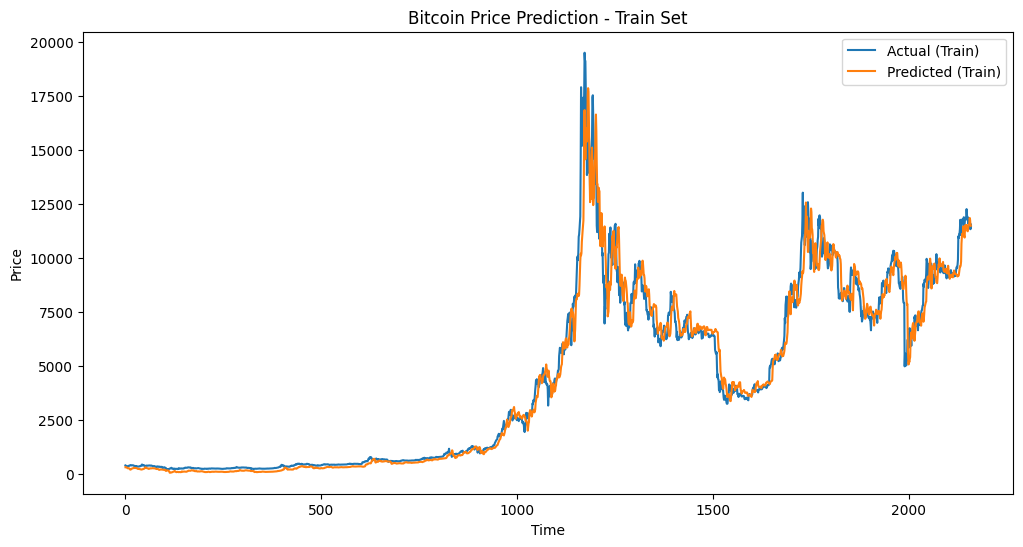

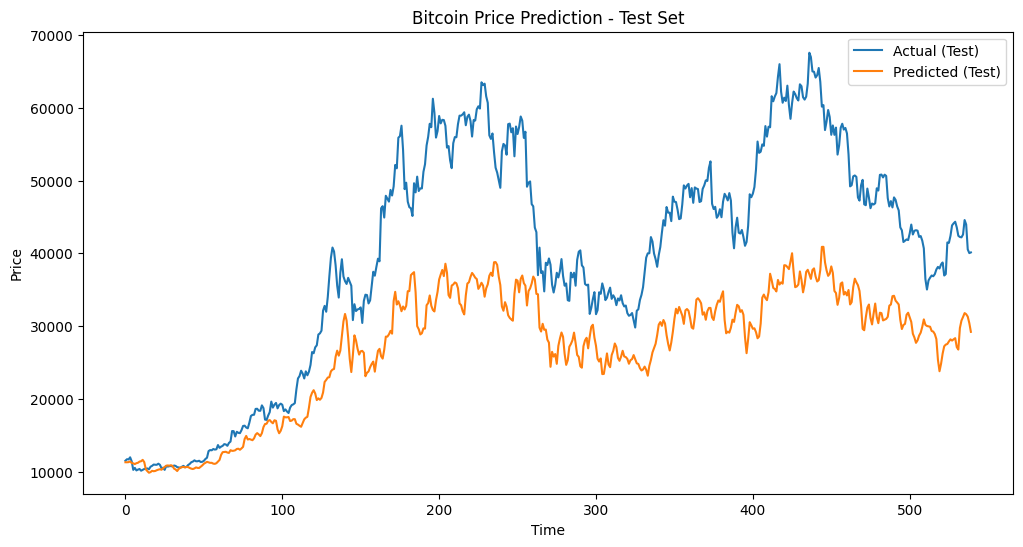

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/content/BTC-USD.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the LSTM model
def create_lstm_model(window_size):
    model = Sequential()
    model.add(LSTM(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the LSTM model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_lstm_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    return y_train, train_predictions, y_test, test_predictions

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train and evaluate the LSTM model
y_train, train_predictions, y_test, test_predictions = train_and_evaluate(prices, window_size, num_days_ahead)

# Plot the graph for train set
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual (Train)')
plt.plot(train_predictions, label='Predicted (Train)')
plt.title('Bitcoin Price Prediction - Train Set')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the graph for test set
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual (Test)')
plt.plot(test_predictions, label='Predicted (Test)')
plt.title('Bitcoin Price Prediction - Test Set')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


**RNN MODELt**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/BTC-USD.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the RNN model
def create_rnn_model(window_size):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the RNN model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_rnn_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate accuracy
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MSE
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Calculate MAPE
    train_mape = np.mean(np.abs((y_train - train_predictions) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

    return train_accuracy, test_accuracy, train_rmse, test_rmse, train_mse, test_mse, train_mape, test_mape

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train and evaluate the RNN model
train_accuracy, test_accuracy, train_rmse, test_rmse, train_mse, test_mse, train_mape, test_mape = train_and_evaluate(prices, window_size, num_days_ahead)

# Print the results
print("Model Accuracy")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nRoot Mean Squared Error (RMSE)")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

print("\nMean Squared Error (MSE)")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

print("\nMean Absolute Percentage Error (MAPE)")
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)


Epoch 1/100
68/68 [==============================] - 1s 2ms/step - loss: 0.0010
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 2.3174e-04
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 2.0265e-04
Epoch 4/100
68/68 [==============================] - 0s 3ms/step - loss: 1.8286e-04
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 1.9204e-04
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 1.6664e-04
Epoch 7/100
68/68 [==============================] - 0s 3ms/step - loss: 1.8990e-04
Epoch 8/100
68/68 [==============================] - 0s 4ms/step - loss: 1.6394e-04
Epoch 9/100
68/68 [==============================] - 0s 3ms/step - loss: 1.7592e-04
Epoch 10/100
68/68 [==============================] - 0s 3ms/step - loss: 1.6086e-04
Epoch 11/100
68/68 [==============================] - 0s 4ms/step - loss: 1.5763e-04
Epoch 12/100
68/68 [==============================] - 0s 2ms/step - loss: 1.55

NEXT 30 DAYS PREDICTION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
data = pd.read_csv('/content/BTC-USD.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the RNN model
def create_rnn_model(window_size):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the RNN model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_rnn_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    return model

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train the RNN model
model = train_and_evaluate(prices, window_size, num_days_ahead)

# Get the last window_size number of data points
last_window = prices[-window_size:].reshape(1, -1)

# Generate predictions for the next 30 days
predictions = []
for _ in range(30):
    next_day_prediction = model.predict(last_window)[0][0]
    predictions.append(next_day_prediction)
    last_window = np.append(last_window[:, 1:], [[next_day_prediction]], axis=1)

# Denormalize the predicted values
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Print the predicted values for the next 30 days
print("Predicted Bitcoin Prices for the Next 30 Days:")
for i, prediction in enumerate(predictions):
    print(f"Day {i+1}: {prediction[0]}")


1/1 [==============================] - 0s 20ms/step
Predicted Bitcoin Prices for the Next 30 Days:
Day 1: 23422.962890625
Day 2: 10157.2294921875
Day 3: 1170.233642578125
Day 4: -4983.65234375
Day 5: -8927.2353515625
Day 6: -12621.0263671875
Day 7: -15558.6748046875
Day 8: -17592.828125
Day 9: -18816.365234375
Day 10: -18930.509765625
Day 11: -18011.267578125
Day 12: -16269.0654296875
Day 13: -13952.7529296875
Day 14: -11412.02734375
Day 15: -8933.3935546875
Day 16: -6717.935546875
Day 17: -4884.42529296875
Day 18: -3450.115478515625
Day 19: -2367.680908203125
Day 20: -1561.4998779296875
Day 21: -955.42822265625
Day 22: -490.0806884765625
Day 23: -121.90667724609375
Day 24: 181.3749542236328
Day 25: 443.3659362792969
Day 26: 680.8619995117188
Day 27: 905.4478149414062
Day 28: 1125.24853515625
Day 29: 1346.23681640625
Day 30: 1572.8779296875


COMPARISION OF GRAPH FOR RNN

17/17 [==============================] - 0s 1ms/step


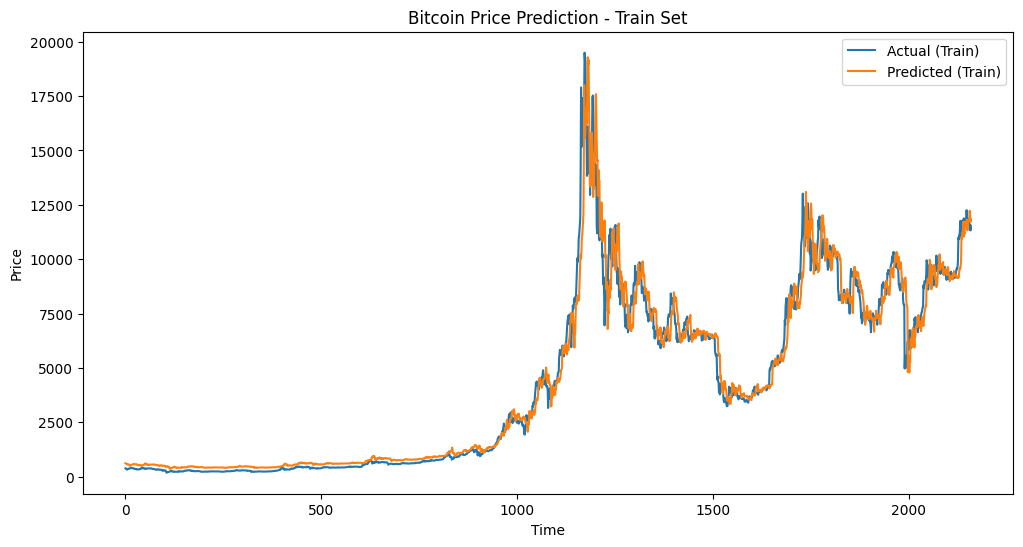

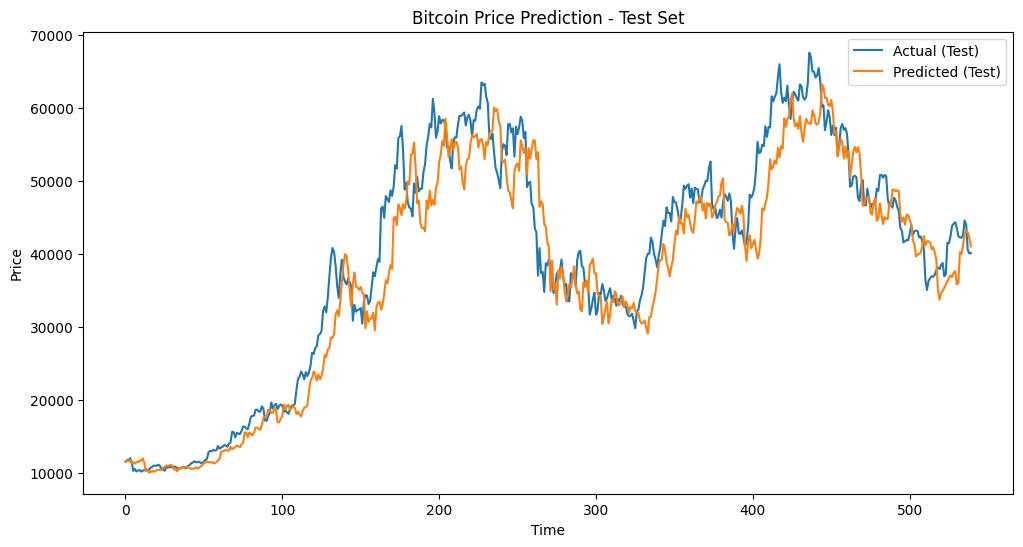

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
data = pd.read_csv('/content/BTC-USD.csv')

# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the 'Close' column to a numpy array
prices = data['Close'].values

# Define the function to create the RNN model
def create_rnn_model(window_size):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the function to train and evaluate the RNN model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_rnn_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    return y_train, train_predictions, y_test, test_predictions

# Define the window size and number of days ahead for prediction
window_size = 7
num_days_ahead = 7

# Train and evaluate the RNN model
y_train, train_predictions, y_test, test_predictions = train_and_evaluate(prices, window_size, num_days_ahead)

# Plot the graph for train set
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual (Train)')
plt.plot(train_predictions, label='Predicted (Train)')
plt.title('Bitcoin Price Prediction - Train Set')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the graph for test set
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual (Test)')
plt.plot(test_predictions, label='Predicted (Test)')
plt.title('Bitcoin Price Prediction - Test Set')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


**LSTM WITH GWO MODEL**

In [ ]:
!pip install pyswarm

Epoch 1/5
49/49 [==============================] - 4s 18ms/step - loss: 9.5335e-04
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 8.1307e-05
Epoch 3/5
49/49 [==============================] - 1s 12ms/step - loss: 7.3202e-05
Epoch 4/5
49/49 [==============================] - 1s 12ms/step - loss: 7.1410e-05
Epoch 5/5
49/49 [==============================] - 1s 12ms/step - loss: 7.0258e-05
Epoch 1/5
49/49 [==============================] - 3s 12ms/step - loss: 7.4967e-05
Epoch 2/5
49/49 [==============================] - 1s 12ms/step - loss: 6.2731e-05
Epoch 3/5
49/49 [==============================] - 1s 12ms/step - loss: 6.4653e-05
Epoch 4/5
49/49 [==============================] - 1s 12ms/step - loss: 5.6165e-05
Epoch 5/5
49/49 [==============================] - 1s 12ms/step - loss: 5.2902e-05
Epoch 1/5
49/49 [==============================] - 3s 12ms/step - loss: 6.0714e-05
Epoch 2/5
49/49 [==============================] - 1s 17ms/step - loss: 4.6899e-05
Epoc

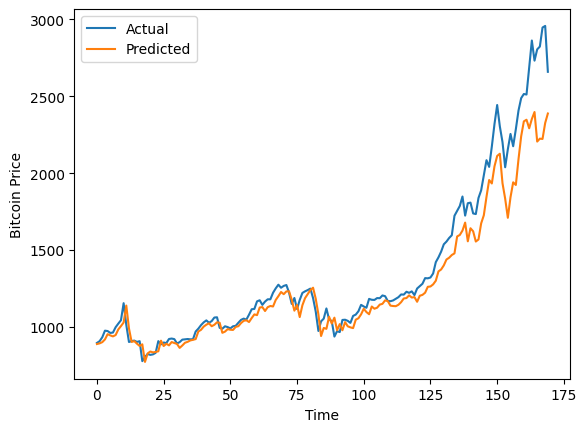

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math


# Load the dataset
dataset = pd.read_csv('/content/BTC-USD.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Reshape input features for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# Define the objective function for GWO
def objective_function(params):
    lr, decay = params
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=1)
    mse = history.history['loss'][-1]
    return mse

# Define the GWO algorithm
class GreyWolfOptimizer:
    def __init__(self, objective_function, lb, ub, dim, population_size, iterations):
        self.objective_function = objective_function
        self.lb = lb
        self.ub = ub
        self.dim = dim
        self.population_size = population_size
        self.iterations = iterations

    def initialize_population(self):
        return np.random.uniform(low=self.lb, high=self.ub, size=(self.population_size, self.dim))

    def search(self):
        alpha_pos = np.zeros(self.dim)
        alpha_score = float("inf")
        beta_pos = np.zeros(self.dim)
        beta_score = float("inf")
        delta_pos = np.zeros(self.dim)
        delta_score = float("inf")
        positions = self.initialize_population()
        convergence_curve = np.zeros(self.iterations)

        for iteration in range(self.iterations):
            for i in range(self.population_size):
                # Update alpha, beta, and delta positions
                if self.objective_function(positions[i]) < alpha_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = alpha_score
                    beta_pos = alpha_pos.copy()
                    alpha_score = self.objective_function(positions[i])
                    alpha_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < beta_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = self.objective_function(positions[i])
                    beta_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < delta_score:
                    delta_score = self.objective_function(positions[i])
                    delta_pos = positions[i].copy()

                # Update positions
                a = 2 - (iteration * (2 / self.iterations))
                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha_pos - positions[i])
                X1 = alpha_pos - A1 * D_alpha

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = np.abs(C2 * beta_pos - positions[i])
                X2 = beta_pos - A2 * D_beta

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = np.abs(C3 * delta_pos - positions[i])
                X3 = delta_pos - A3 * D_delta

                positions[i] = (X1 + X2 + X3) / 3

            convergence_curve[iteration] = alpha_score

        return alpha_pos, alpha_score, convergence_curve

# Define the bounds, dimension, population size, and number of iterations for GWO
lb = [0.0001, 0.0001]
ub = [0.1, 0.9]
dim = 2
population_size = 10
iterations = 10

# Create an instance of GreyWolfOptimizer and perform the search
gwo = GreyWolfOptimizer(objective_function, lb, ub, dim, population_size, iterations)
alpha_pos, alpha_score, convergence_curve = gwo.search()

# Compile the model with optimal parameters
lr_opt = alpha_pos[0]
decay_opt = alpha_pos[1]
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with optimal parameters
model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Rescale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate evaluation metrics
train_rmse = math.sqrt(mean_squared_error(Y_train[0], train_predictions[:, 0]))
test_rmse = math.sqrt(mean_squared_error(Y_test[0], test_predictions[:, 0]))
train_mse = mean_squared_error(Y_train[0], train_predictions[:, 0])
test_mse = mean_squared_error(Y_test[0], test_predictions[:, 0])
train_mape = mean_absolute_percentage_error(Y_train[0], train_predictions[:, 0])
test_mape = mean_absolute_percentage_error(Y_test[0], test_predictions[:, 0])

# Print evaluation metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test[0], label='Actual')
plt.plot(test_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()




**RNN WITH GWO MODEL**

Epoch 1/5
49/49 [==============================] - 1s 6ms/step - loss: 0.0021
Epoch 2/5
49/49 [==============================] - 0s 6ms/step - loss: 2.3593e-04
Epoch 3/5
49/49 [==============================] - 0s 6ms/step - loss: 1.7254e-04
Epoch 4/5
49/49 [==============================] - 0s 6ms/step - loss: 1.3764e-04
Epoch 5/5
49/49 [==============================] - 0s 6ms/step - loss: 1.3687e-04
Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 1.9963e-04
Epoch 2/5
49/49 [==============================] - 0s 9ms/step - loss: 8.5358e-05
Epoch 3/5
49/49 [==============================] - 0s 9ms/step - loss: 8.5801e-05
Epoch 4/5
49/49 [==============================] - 0s 9ms/step - loss: 6.5860e-05
Epoch 5/5
49/49 [==============================] - 0s 9ms/step - loss: 5.8741e-05
Epoch 1/5
49/49 [==============================] - 2s 6ms/step - loss: 6.9934e-05
Epoch 2/5
49/49 [==============================] - 0s 6ms/step - loss: 4.7367e-05
Epoch 3/5
49/49 [==

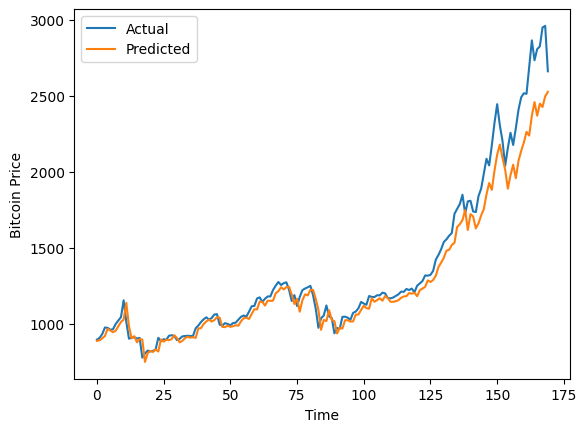

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math


# Load the dataset
dataset = pd.read_csv('/content/BTC-USD.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Reshape input features for RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# Define the objective function for GWO
def objective_function(params):
    lr, decay = params
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=1)
    mse = history.history['loss'][-1]
    return mse

# Define the GWO algorithm
class GreyWolfOptimizer:
    def __init__(self, objective_function, lb, ub, dim, population_size, iterations):
        self.objective_function = objective_function
        self.lb = lb
        self.ub = ub
        self.dim = dim
        self.population_size = population_size
        self.iterations = iterations

    def initialize_population(self):
        return np.random.uniform(low=self.lb, high=self.ub, size=(self.population_size, self.dim))

    def search(self):
        alpha_pos = np.zeros(self.dim)
        alpha_score = float("inf")
        beta_pos = np.zeros(self.dim)
        beta_score = float("inf")
        delta_pos = np.zeros(self.dim)
        delta_score = float("inf")
        positions = self.initialize_population()
        convergence_curve = np.zeros(self.iterations)

        for iteration in range(self.iterations):
            for i in range(self.population_size):
                # Update alpha, beta, and delta positions
                if self.objective_function(positions[i]) < alpha_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = alpha_score
                    beta_pos = alpha_pos.copy()
                    alpha_score = self.objective_function(positions[i])
                    alpha_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < beta_score:
                    delta_score = beta_score
                    delta_pos = beta_pos.copy()
                    beta_score = self.objective_function(positions[i])
                    beta_pos = positions[i].copy()
                elif self.objective_function(positions[i]) < delta_score:
                    delta_score = self.objective_function(positions[i])
                    delta_pos = positions[i].copy()

                # Update positions
                a = 2 - (iteration * (2 / self.iterations))
                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha_pos - positions[i])
                X1 = alpha_pos - A1 * D_alpha

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = np.abs(C2 * beta_pos - positions[i])
                X2 = beta_pos - A2 * D_beta

                r1 = np.random.random(self.dim)
                r2 = np.random.random(self.dim)
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = np.abs(C3 * delta_pos - positions[i])
                X3 = delta_pos - A3 * D_delta

                positions[i] = (X1 + X2 + X3) / 3

            convergence_curve[iteration] = alpha_score

        return alpha_pos, alpha_score, convergence_curve

# Define the bounds, dimension, population size, and number of iterations for GWO
lb = [0.0001, 0.0001]
ub = [0.1, 0.9]
dim = 2
population_size = 10
iterations = 10

# Create an instance of GreyWolfOptimizer and perform the search
gwo = GreyWolfOptimizer(objective_function, lb, ub, dim, population_size, iterations)
alpha_pos, alpha_score, convergence_curve = gwo.search()

# Compile the model with optimal parameters
lr_opt = alpha_pos[0]
decay_opt = alpha_pos[1]
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with optimal parameters
model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Rescale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

# Calculate evaluation metrics
train_rmse = math.sqrt(mean_squared_error(Y_train[0], train_predictions[:, 0]))
test_rmse = math.sqrt(mean_squared_error(Y_test[0], test_predictions[:, 0]))
train_mse = mean_squared_error(Y_train[0], train_predictions[:, 0])
test_mse = mean_squared_error(Y_test[0], test_predictions[:, 0])
train_mape = mean_absolute_percentage_error(Y_train[0], train_predictions[:, 0])
test_mape = mean_absolute_percentage_error(Y_test[0], test_predictions[:, 0])

# Print evaluation metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test[0], label='Actual')
plt.plot(test_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()



**LSTM WITH PSO MODEL**

In [ ]:
!pip install pyswarms


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.6 MB/s eta 0:00:00


2023-07-11 04:32:40,960 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/50

Epoch 1/5
49/49 [==============================] - 4s 13ms/step - loss: 0.0140
Epoch 2/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0068
Epoch 3/5
49/49 [==============================] - 1s 18ms/step - loss: 0.0060
Epoch 4/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0056
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:   2%|▏         |1/50, best_cost=199

Epoch 1/5
49/49 [==============================] - 3s 13ms/step - loss: 0.0111
Epoch 2/5
49/49 [==============================] - 1s 13ms/step - loss: 0.0052
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0044
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0038
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:   4%|▍         |2/50, best_cost=150

Epoch 1/5
49/49 [==============================] - 4s 15ms/step - loss: 1.7962e-04
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 6.5778e-05
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 6.8765e-05
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 6.4329e-05
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:   6%|▌         |3/50, best_cost=21.7

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0134
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0048
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0028
Epoch 4/5
49/49 [==============================] - 1s 20ms/step - loss: 0.0011
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:   8%|▊         |4/50, best_cost=21.7

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0012
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 4.9843e-04
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 1.9783e-04
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 8.2898e-05
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  10%|█         |5/50, best_cost=21.7

Epoch 1/5
49/49 [==============================] - 5s 31ms/step - loss: 1.0087e-04
Epoch 2/5
49/49 [==============================] - 1s 24ms/step - loss: 7.8704e-05
Epoch 3/5
49/49 [==============================] - 1s 23ms/step - loss: 6.6165e-05
Epoch 4/5
49/49 [==============================] - 2s 34ms/step - loss: 6.4312e-05
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  12%|█▏        |6/50, best_cost=21.7

Epoch 1/5
49/49 [==============================] - 5s 15ms/step - loss: 0.0044
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0024
Epoch 3/5
49/49 [==============================] - 1s 16ms/step - loss: 0.0019
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0012
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  14%|█▍        |7/50, best_cost=21.7

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 7.0148e-05
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 7.1200e-05
Epoch 3/5
49/49 [==============================] - 1s 18ms/step - loss: 6.4326e-05
Epoch 4/5
49/49 [==============================] - 1s 20ms/step - loss: 6.6524e-05
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  16%|█▌        |8/50, best_cost=21.2

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 4.5667e-04
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 1.2420e-04
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 6.2346e-05
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 5.9415e-05
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  18%|█▊        |9/50, best_cost=21.2

Epoch 1/5
49/49 [==============================] - 4s 16ms/step - loss: 5.8410e-04
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 1.8837e-04
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 6.1358e-05
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 4.4397e-05
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  20%|██        |10/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 4.6162e-04
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 1.5451e-04
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 1.4451e-04
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 1.3339e-04
Epoch 5/5
25/25 [==============================] - 1s 3ms/step


pyswarms.single.global_best:  22%|██▏       |11/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 4s 15ms/step - loss: 1.3457e-04
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 8.8982e-05
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 9.1435e-05
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 8.2348e-05
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  24%|██▍       |12/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 4s 20ms/step - loss: 0.0022
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 6.5598e-04
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 2.1485e-04
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  26%|██▌       |13/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 15ms/step - loss: 0.0031
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 9.6168e-04
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 5.9851e-04
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  28%|██▊       |14/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 5s 14ms/step - loss: 0.0034
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0020
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0015
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  30%|███       |15/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 19ms/step - loss: 0.0073
Epoch 2/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0045
Epoch 3/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0033
Epoch 4/5
49/49 [==============================] - 1s 13ms/step - loss: 0.0018
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  32%|███▏      |16/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 13ms/step - loss: 0.0098
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0051
Epoch 3/5
49/49 [==============================] - 1s 13ms/step - loss: 0.0046
Epoch 4/5
49/49 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  34%|███▍      |17/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 4s 14ms/step - loss: 1.9633e-04
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 5.2689e-05
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 4.5573e-05
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 4.6032e-05
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  36%|███▌      |18/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0032
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0017
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 4/5
49/49 [==============================] - 1s 17ms/step - loss: 9.1952e-04
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  38%|███▊      |19/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0053
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0030
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0026
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0021
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  40%|████      |20/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 19ms/step - loss: 0.0025
Epoch 2/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0013
Epoch 3/5
49/49 [==============================] - 1s 18ms/step - loss: 9.3604e-04
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 5.1847e-04
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


pyswarms.single.global_best:  42%|████▏     |21/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 13ms/step - loss: 0.0173
Epoch 2/5
49/49 [==============================] - 1s 13ms/step - loss: 0.0082
Epoch 3/5
49/49 [==============================] - 1s 13ms/step - loss: 0.0069
Epoch 4/5
49/49 [==============================] - 1s 13ms/step - loss: 0.0061
Epoch 5/5
25/25 [==============================] - 2s 5ms/step


pyswarms.single.global_best:  44%|████▍     |22/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 15ms/step - loss: 0.0105
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0049
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0043
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0036
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  46%|████▌     |23/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 19ms/step - loss: 0.0064
Epoch 2/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0034
Epoch 3/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0029
Epoch 4/5
49/49 [==============================] - 1s 18ms/step - loss: 0.0026
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  48%|████▊     |24/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0016
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 4.7565e-04
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 1.6555e-04
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 1.0922e-04
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  50%|█████     |25/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0063
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0036
Epoch 3/5
49/49 [==============================] - 1s 13ms/step - loss: 0.0033
Epoch 4/5
49/49 [==============================] - 1s 13ms/step - loss: 0.0031
Epoch 5/5
25/25 [==============================] - 0s 4ms/step


pyswarms.single.global_best:  52%|█████▏    |26/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 4s 15ms/step - loss: 0.0031
Epoch 2/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0016
Epoch 3/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0011
Epoch 4/5
49/49 [==============================] - 1s 20ms/step - loss: 6.4717e-04
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  54%|█████▍    |27/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 15ms/step - loss: 0.0036
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0022
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0017
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  56%|█████▌    |28/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 4s 15ms/step - loss: 0.0027
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0014
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 9.4092e-04
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 4.9156e-04
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  58%|█████▊    |29/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 15ms/step - loss: 1.9555e-04
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 1.1528e-04
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 1.1048e-04
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 1.0453e-04
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  60%|██████    |30/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0021
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 6.5024e-04
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 2.5370e-04
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  62%|██████▏   |31/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 18ms/step - loss: 0.0036
Epoch 2/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0020
Epoch 3/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0016
Epoch 4/5
49/49 [==============================] - 1s 16ms/step - loss: 0.0011
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  64%|██████▍   |32/50, best_cost=18.3

Epoch 1/5
49/49 [==============================] - 3s 15ms/step - loss: 4.8847e-04
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 1.9527e-04
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 7.0922e-05
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 3.7867e-05
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  66%|██████▌   |33/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0309
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0135
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0112
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0100
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  68%|██████▊   |34/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 15ms/step - loss: 0.0026
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0010
Epoch 4/5
49/49 [==============================] - 1s 20ms/step - loss: 5.9209e-04
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


pyswarms.single.global_best:  70%|███████   |35/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0088
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0045
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0036
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0027
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  72%|███████▏  |36/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 1.0945e-04
Epoch 2/5
49/49 [==============================] - 1s 17ms/step - loss: 6.8137e-05
Epoch 3/5
49/49 [==============================] - 1s 18ms/step - loss: 6.7250e-05
Epoch 4/5
49/49 [==============================] - 1s 19ms/step - loss: 6.5623e-05
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  74%|███████▍  |37/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 15ms/step - loss: 0.0147
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0065
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0055
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  76%|███████▌  |38/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 4s 14ms/step - loss: 0.0061
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0030
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0024
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0020
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  78%|███████▊  |39/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 15ms/step - loss: 0.0015
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 8.3682e-04
Epoch 3/5
49/49 [==============================] - 1s 18ms/step - loss: 5.1106e-04
Epoch 4/5
49/49 [==============================] - 1s 19ms/step - loss: 2.5131e-04
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  80%|████████  |40/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 4.5564e-05
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 4.1540e-05
Epoch 3/5
49/49 [==============================] - 1s 16ms/step - loss: 4.3550e-05
Epoch 4/5
49/49 [==============================] - 1s 19ms/step - loss: 4.0426e-05
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  82%|████████▏ |41/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 5s 15ms/step - loss: 0.0019
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 3.4864e-04
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 1.5792e-04
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 1.0925e-04
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  84%|████████▍ |42/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0076
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0042
Epoch 3/5
49/49 [==============================] - 1s 17ms/step - loss: 0.0038
Epoch 4/5
49/49 [==============================] - 1s 20ms/step - loss: 0.0036
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  86%|████████▌ |43/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0109
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0057
Epoch 3/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0051
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0048
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  88%|████████▊ |44/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 4s 16ms/step - loss: 5.4162e-05
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 5.4034e-05
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 5.3278e-05
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 5.5246e-05
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  90%|█████████ |45/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0089
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0046
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 4/5
49/49 [==============================] - 1s 18ms/step - loss: 0.0037
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  92%|█████████▏|46/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 13ms/step - loss: 1.2840e-04
Epoch 2/5
49/49 [==============================] - 1s 14ms/step - loss: 8.1512e-05
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 7.8574e-05
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 7.7373e-05
Epoch 5/5
25/25 [==============================] - 2s 5ms/step


pyswarms.single.global_best:  94%|█████████▍|47/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 4s 15ms/step - loss: 0.0331
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0146
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 0.0125
Epoch 4/5
49/49 [==============================] - 1s 15ms/step - loss: 0.0111
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  96%|█████████▌|48/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0070
Epoch 2/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0033
Epoch 3/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0029
Epoch 4/5
49/49 [==============================] - 1s 19ms/step - loss: 0.0026
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best:  98%|█████████▊|49/50, best_cost=15.9

Epoch 1/5
49/49 [==============================] - 3s 14ms/step - loss: 0.0015
Epoch 2/5
49/49 [==============================] - 1s 15ms/step - loss: 7.1811e-04
Epoch 3/5
49/49 [==============================] - 1s 14ms/step - loss: 3.0014e-04
Epoch 4/5
49/49 [==============================] - 1s 14ms/step - loss: 1.0406e-04
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


pyswarms.single.global_best: 100%|██████████|50/50, best_cost=15.9
2023-07-11 04:39:34,600 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 15.9350759229179, best pos: [1.33755856]


Best Number of LSTM Units: 2
Epoch 1/5
49/49 - 4s - loss: 0.0157 - 4s/epoch - 72ms/step
Epoch 2/5
49/49 - 1s - loss: 0.0066 - 713ms/epoch - 15ms/step
Epoch 3/5
49/49 - 1s - loss: 0.0052 - 588ms/epoch - 12ms/step
Epoch 4/5
49/49 - 1s - loss: 0.0044 - 580ms/epoch - 12ms/step
Epoch 5/5
49/49 - 1s - loss: 0.0035 - 603ms/epoch - 12ms/step
6/6 [==============================] - 0s 4ms/step
Train RMSE: 150.551627231694
Test RMSE: 1027.4214340190936
Train MSE: 22665.79246211095
Test MSE: 1055594.8030818505
Train MAPE: 0.3561637249163938
Test MAPE: 0.6397218139912912


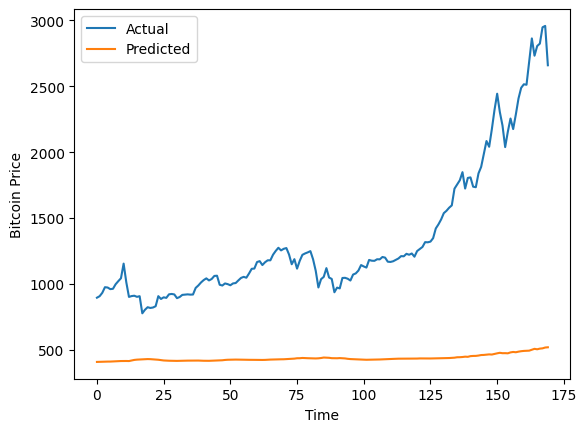

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math
from pyswarms.single.global_best import GlobalBestPSO

# Load the dataset
dataset = pd.read_csv('/content/BTC-USD.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Reshape input features for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the objective function for PSO
def objective_function(position):
    lstm_units = int(position[0]) + 1

    model = Sequential()
    model.add(LSTM(units=lstm_units, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=1)

    train_predictions = model.predict(X_train)
    train_predictions = scaler.inverse_transform(train_predictions)
    Y_train_inverse = scaler.inverse_transform([Y_train])

    rmse = math.sqrt(mean_squared_error(Y_train_inverse[0], train_predictions[:, 0]))
    return rmse

# Configure the PSO optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=1, options=options)

# Run the PSO optimization
best_cost, best_position = optimizer.optimize(objective_function, iters=50)

# Extract the best number of LSTM units from the best position found by PSO
best_lstm_units = int(best_position[0]) + 1

# Print the best number of LSTM units
print("Best Number of LSTM Units:", best_lstm_units)

# Build and train the LSTM model with the best number of units
model = Sequential()
model.add(LSTM(units=best_lstm_units, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Rescale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train_inverse = scaler.inverse_transform([Y_train])
Y_test_inverse = scaler.inverse_transform([Y_test])

# Calculate evaluation metrics
train_rmse = math.sqrt(mean_squared_error(Y_train_inverse[0], train_predictions[:, 0]))
test_rmse = math.sqrt(mean_squared_error(Y_test_inverse[0], test_predictions[:, 0]))
train_mse = mean_squared_error(Y_train_inverse[0], train_predictions[:, 0])
test_mse = mean_squared_error(Y_test_inverse[0], test_predictions[:, 0])
train_mape = mean_absolute_percentage_error(Y_train_inverse[0], train_predictions[:, 0])
test_mape = mean_absolute_percentage_error(Y_test_inverse[0], test_predictions[:, 0])

# Print evaluation metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test_inverse[0], label='Actual')
plt.plot(test_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()



**RNN WITH PSO**

2023-07-12 04:34:39,742 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/50

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0759
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:   2%|▏         |1/50, best_cost=174

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0063
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:   4%|▍         |2/50, best_cost=86.1

Epoch 1/5
49/49 [==============================] - 1s 4ms/step - loss: 0.0123
Epoch 2/5
49/49 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:   6%|▌         |3/50, best_cost=86.1

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.1047
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:   8%|▊         |4/50, best_cost=86.1

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0071
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  10%|█         |5/50, best_cost=86.1

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0034
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 5.3899e-04
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 5.1956e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 4.6879e-04
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  12%|█▏        |6/50, best_cost=54.9

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 5.5852e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 3.1463e-04
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  14%|█▍        |7/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.2222
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.1320
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0928
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0690
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  16%|█▌        |8/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 4ms/step - loss: 0.1732
Epoch 2/5
49/49 [==============================] - 0s 4ms/step - loss: 0.0891
Epoch 3/5
49/49 [==============================] - 0s 4ms/step - loss: 0.0608
Epoch 4/5
49/49 [==============================] - 0s 4ms/step - loss: 0.0450
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  18%|█▊        |9/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0748
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  20%|██        |10/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.4354
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.2477
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.1672
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.1241
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  22%|██▏       |11/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.1187
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  24%|██▍       |12/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0132
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  26%|██▌       |13/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 2.1399e-04
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 2.3538e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 2.0836e-04
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  28%|██▊       |14/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 4ms/step - loss: 0.0057
Epoch 2/5
49/49 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 3/5
49/49 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 4/5
49/49 [==============================] - 0s 4ms/step - loss: 8.8063e-04
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  30%|███       |15/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0079
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  32%|███▏      |16/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0296
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  34%|███▍      |17/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0582
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  36%|███▌      |18/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0075
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 3/5
49/49 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  38%|███▊      |19/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 4.4330e-04
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 3.5472e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 2.9036e-04
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  40%|████      |20/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 4/5
49/49 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  42%|████▏     |21/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 4ms/step - loss: 0.0754
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0336
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  44%|████▍     |22/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0036
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 9.0695e-04
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  46%|████▌     |23/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 6.0162e-04
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  48%|████▊     |24/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0093
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 9.6543e-04
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 3.6915e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 2.2877e-04
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  50%|█████     |25/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.6997
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.2556
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.1498
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.1026
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  52%|█████▏    |26/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0421
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  54%|█████▍    |27/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 2/5
49/49 [==============================] - 0s 4ms/step - loss: 5.0879e-04
Epoch 3/5
49/49 [==============================] - 0s 4ms/step - loss: 4.4733e-04
Epoch 4/5
49/49 [==============================] - 0s 4ms/step - loss: 4.2289e-04
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  56%|█████▌    |28/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0067
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  58%|█████▊    |29/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.2731
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.1379
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0921
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0669
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  60%|██████    |30/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 9.9318e-04
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  62%|██████▏   |31/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.3931
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.2298
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.1569
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.1171
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  64%|██████▍   |32/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0051
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  66%|██████▌   |33/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 5ms/step - loss: 0.0019
Epoch 2/5
49/49 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 3/5
49/49 [==============================] - 0s 4ms/step - loss: 7.0836e-04
Epoch 4/5
49/49 [==============================] - 0s 4ms/step - loss: 5.1941e-04
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  68%|██████▊   |34/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 8.4191e-04
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 6.7843e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 5.2945e-04
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  70%|███████   |35/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0037
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 8.1411e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 4.0712e-04
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  72%|███████▏  |36/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0026
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 8.5387e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 6.8822e-04
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  74%|███████▍  |37/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0037
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  76%|███████▌  |38/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0132
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 3/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  78%|███████▊  |39/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 5ms/step - loss: 0.0045
Epoch 2/5
49/49 [==============================] - 0s 4ms/step - loss: 7.4240e-04
Epoch 3/5
49/49 [==============================] - 0s 4ms/step - loss: 5.8964e-04
Epoch 4/5
49/49 [==============================] - 0s 5ms/step - loss: 5.4856e-04
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  80%|████████  |40/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0812
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  82%|████████▏ |41/50, best_cost=35.2

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0020
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 2.3298e-04
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 1.4356e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 9.3011e-05
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  84%|████████▍ |42/50, best_cost=24

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0036
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 6.0509e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 3.3999e-04
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  86%|████████▌ |43/50, best_cost=24

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 6.5346e-04
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  88%|████████▊ |44/50, best_cost=24

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0049
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 9.6676e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 9.0499e-04
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  90%|█████████ |45/50, best_cost=24

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0131
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 4.6991e-04
Epoch 4/5
49/49 [==============================] - 0s 4ms/step - loss: 3.4918e-04
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  92%|█████████▏|46/50, best_cost=24

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 7.6400e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 6.0907e-04
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  94%|█████████▍|47/50, best_cost=24

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0591
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 5/5
25/25 [==============================] - 0s 1ms/step


pyswarms.single.global_best:  96%|█████████▌|48/50, best_cost=24

Epoch 1/5
49/49 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 3/5
49/49 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 8.2917e-04
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best:  98%|█████████▊|49/50, best_cost=24

Epoch 1/5
49/49 [==============================] - 1s 4ms/step - loss: 2.7910e-04
Epoch 2/5
49/49 [==============================] - 0s 3ms/step - loss: 2.5112e-04
Epoch 3/5
49/49 [==============================] - 0s 4ms/step - loss: 2.3747e-04
Epoch 4/5
49/49 [==============================] - 0s 3ms/step - loss: 2.2405e-04
Epoch 5/5
25/25 [==============================] - 0s 2ms/step


pyswarms.single.global_best: 100%|██████████|50/50, best_cost=24
2023-07-12 04:36:15,468 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 23.965525485631456, best pos: [1.00232842]


Best Number of RNN Units: 2
Epoch 1/5
49/49 - 1s - loss: 0.0508 - 804ms/epoch - 16ms/step
Epoch 2/5
49/49 - 0s - loss: 0.0088 - 147ms/epoch - 3ms/step
Epoch 3/5
49/49 - 0s - loss: 0.0029 - 151ms/epoch - 3ms/step
Epoch 4/5
49/49 - 0s - loss: 0.0017 - 144ms/epoch - 3ms/step
Epoch 5/5
49/49 - 0s - loss: 0.0014 - 140ms/epoch - 3ms/step
6/6 [==============================] - 0s 2ms/step
Train RMSE: 97.90959613051082
Test RMSE: 619.3906383542776
Train MSE: 9586.289014439739
Test MSE: 383644.7628809195
Train MAPE: 0.20077981512489582
Test MAPE: 0.45985352236004284


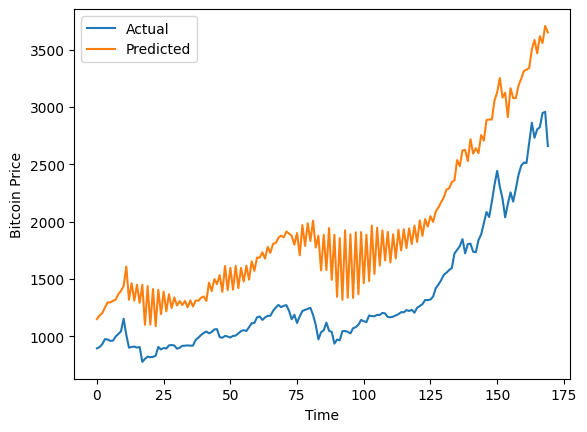

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math
from pyswarms.single.global_best import GlobalBestPSO

# Load the dataset
dataset = pd.read_csv('/content/BTC-USD.csv')
dataset = dataset[:1000]  # Reduce dataset to 1000 values

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create input features and target variable
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Define time steps and create train/test datasets
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

# Reshape input features for RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the objective function for PSO
def objective_function(position):
    rnn_units = int(position[0]) + 1

    model = Sequential()
    model.add(SimpleRNN(units=rnn_units, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=1)

    train_predictions = model.predict(X_train)
    train_predictions = scaler.inverse_transform(train_predictions)
    Y_train_inverse = scaler.inverse_transform([Y_train])

    rmse = math.sqrt(mean_squared_error(Y_train_inverse[0], train_predictions[:, 0]))
    return rmse

# Configure the PSO optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=1, options=options)

# Run the PSO optimization
best_cost, best_position = optimizer.optimize(objective_function, iters=50)

# Extract the best number of RNN units from the best position found by PSO
best_rnn_units = int(best_position[0]) + 1

# Print the best number of RNN units
print("Best Number of RNN Units:", best_rnn_units)

# Build and train the RNN model with the best number of units
model = Sequential()
model.add(SimpleRNN(units=best_rnn_units, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=5, batch_size=16, verbose=2)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Rescale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train_inverse = scaler.inverse_transform([Y_train])
Y_test_inverse = scaler.inverse_transform([Y_test])

# Calculate evaluation metrics
train_rmse = math.sqrt(mean_squared_error(Y_train_inverse[0], train_predictions[:, 0]))
test_rmse = math.sqrt(mean_squared_error(Y_test_inverse[0], test_predictions[:, 0]))
train_mse = mean_squared_error(Y_train_inverse[0], train_predictions[:, 0])
test_mse = mean_squared_error(Y_test_inverse[0], test_predictions[:, 0])
train_mape = mean_absolute_percentage_error(Y_train_inverse[0], train_predictions[:, 0])
test_mape = mean_absolute_percentage_error(Y_test_inverse[0], test_predictions[:, 0])

# Print evaluation metrics
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train MAPE:', train_mape)
print('Test MAPE:', test_mape)

# Plot the predictions
plt.plot(Y_test_inverse[0], label='Actual')
plt.plot(test_predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()
